# 0. Mount Google Drive

In [77]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [78]:
# Check the directory
!ls "/content/gdrive/My Drive/Colab Notebooks"

 4.4.ipynb
 628156_5.1.ipynb
'6288156_Model Selection for Classification.ipynb'
'6288156_Model Selection for Regression.ipynb'
 BreastCancer.ipynb
 Class.ipynb
 data
 Digits.ipynb
 Heart.ipynb
 Img.ipynb
 Iris.ipynb
 Pocket.ipynb
'W5.1 Introduction to Decision Tree (1).ipynb'
'W5.1 Introduction to Decision Tree.ipynb'
'W5.2 Decision Tree on the Iris Dataset.ipynb'
'W6.1 - Model Selection for Classification.ipynb'
'W6.2 - Model Selection for Regression.ipynb'


In [79]:
# Data directory
data_dir = '/content/gdrive/My Drive/Colab Notebooks/data'

!ls '$data_dir'

'countries of the world_cleaner.csv'   titanic_data_cleaner.csv


# 1. Prepare Environment

In [80]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Load Dataset

In this task, you will predict whether a passenger would survive
[[kaggle](https://www.kaggle.com/c/titanic)].

## Data Dictionary

| Variable  |        Definition                                    |                 Key                               |
|-----------------|--------------------------------------------|------------------------------------------------|
| survival        | Survival (label)                                  | 0 = No, 1 = Yes                                |
| pclass          | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex             | Sex                                        |                                                |
| Age             | Age in years                               |                                                |
| sibsp           | # of siblings / spouses aboard the Titanic |                                                |
| parch           | # of parents / children aboard the Titanic |                                                |
| ticket          | Ticket number                              |                                                |
| fare            | Passenger fare                             |                                                |
| cabin           | Cabin number                               |                                                |
| embarked        | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

We have already done some preprocessing on the data to simplify the next process. You can also try on the raw data.

First, you download the [titanic_data_cleaner.csv](https://drive.google.com/file/d/1TSXkI-2yMiWBHx3ylFVlZlW_Clvg9Dah/view?usp=sharing) and then upload it to your Google Drive. The recommended location is in the `Colab Notebooks/data` folder.

Then run the following command to read the csv file in your Google Drive.

In [81]:
data_path = os.path.join(data_dir, 'titanic_data_cleaner.csv')
df = pd.read_csv(data_path)

In [ ]:
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,UNK,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,UNK,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,UNK,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,UNK,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,UNK,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


# 3. Data Preparation

In this section, we will prepare the dataset into a format that can be used to train models.

## 3.1 Feature Selection

How do we know which features can be used to predict whether the passenger will survided the crash?

* Domain Expert Knowledge
* Visual Inspection
* Feature Selection Algorithms (see more [link1](https://scikit-learn.org/stable/modules/feature_selection.html), [link2](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)) 




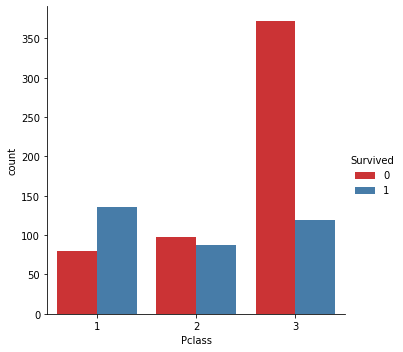

In [82]:
# Let's see the Pclass
sns.catplot(
    data=df, hue='Survived',
    x='Pclass', kind='count', palette='Set1')

How about the `'Sex'`, `'Embarked'` and `'Cabin'`?

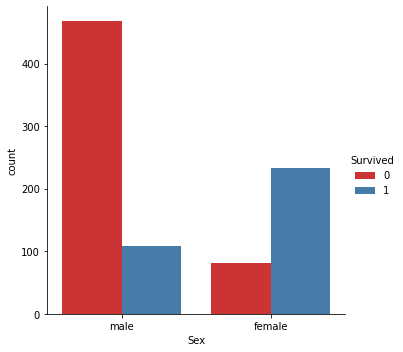

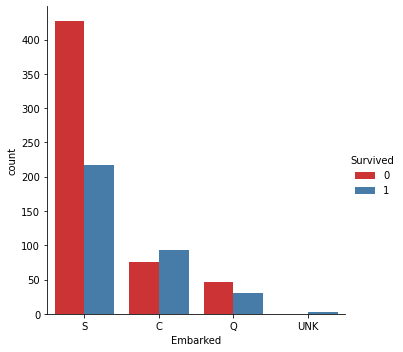

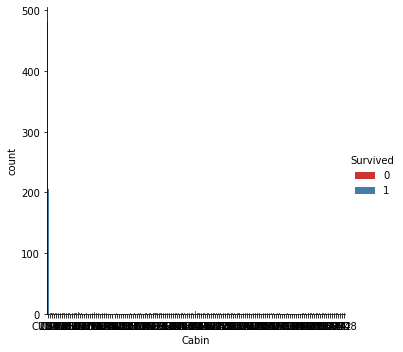

In [ ]:
# YOUR CODE HERE
sns.catplot(
    data=df, hue='Survived',
    x='Sex', kind='count', palette='Set1')

sns.catplot(
    data=df, hue='Survived',
    x='Embarked', kind='count', palette='Set1')

sns.catplot(
    data=df, hue='Survived',
    x='Cabin', kind='count', palette='Set1')

Which feature should we use?

In [ ]:
# YOUR CODE HERE
data_df = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [ ]:
data_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


## 3.2 Categorical Columns

scikit-learn expects numerical tensors, so we have to convert our `str` data into number.

In [ ]:
from sklearn.preprocessing import LabelEncoder

sex_enc = LabelEncoder()

data_df['Sex_code'] = sex_enc.fit_transform(data_df['Sex'])
print(sex_enc.classes_)

data_df

['female' 'male']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_code
0,0,3,male,22.000000,1,0,7.2500,S,1
1,1,1,female,38.000000,1,0,71.2833,C,0
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,0
4,0,3,male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1
887,1,1,female,19.000000,0,0,30.0000,S,0
888,0,3,female,29.699118,1,2,23.4500,S,0
889,1,1,male,26.000000,0,0,30.0000,C,1


In [ ]:
emb_df = pd.get_dummies(df['Embarked'], prefix='Embarked')
emb_df

,Embarked_C,Embarked_Q,Embarked_S,Embarked_UNK
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
886,0,0,1,0
887,0,0,1,0
888,0,0,1,0
889,1,0,0,0


In [ ]:
clean_df = pd.concat([data_df, emb_df], axis=1)
clean_df = clean_df.drop(columns=['Sex','Embarked'])
clean_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_code,Embarked_C,Embarked_Q,Embarked_S,Embarked_UNK
0,0,3,22.000000,1,0,7.2500,1,0,0,1,0
1,1,1,38.000000,1,0,71.2833,0,1,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1,0
3,1,1,35.000000,1,0,53.1000,0,0,0,1,0
4,0,3,35.000000,0,0,8.0500,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,1,0
887,1,1,19.000000,0,0,30.0000,0,0,0,1,0
888,0,3,29.699118,1,2,23.4500,0,0,0,1,0
889,1,1,26.000000,0,0,30.0000,1,1,0,0,0


# 4. Prepare Train/Valid/Test Sets

We first extract the features and labels.

In [ ]:
X = clean_df.drop(columns=['Survived']).values
y = clean_df['Survived'].values

Next we split the dataset into training/validation/test set.
* Training set: `X_train`, `y_train`
* Validation set: `X_valid`, `y_valid`
* Test set: `X_test`, `y_test`

The following is an example of how to split the dataset into a training and a test sets.

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=42,
    test_size=0.20)  # 80:20
```

Let's split the dataset.

In [ ]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=42,
    test_size=0.20)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test,
    random_state=42,
    test_size=0.50)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_valid.shape}, {y_valid.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (712, 10), (712,)
Validation set: (89, 10), (89,)
Test set: (90, 10), (90,)


# 5. Model Selection

In this section, you will write code to train the model on the training set and evaluate it on the validation set.

Let's start by creating and training a model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

Next, we use the trained model to predict whether the passengers in both the training and the validation sets will survive the titanic crash or not.

In [ ]:
# YOUR CODE HERE
y_hat_train = model.predict(X_train)
y_hat_valid = model.predict(X_valid)

Then we determine the prediction performance on the training and the validation set to investigate whether our model has the **underfitting** or **overfitting** problems or not.

Here, we use the common metrics for classification problems which are: **accuracy, precision, recall and f1-score**.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Training Set')
print(confusion_matrix(y_true=y_train, y_pred=y_hat_train))
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'Precision: {precision_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'F1-score: {f1_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print('')
print('Validation Set')
print(confusion_matrix(y_true=y_valid, y_pred=y_hat_valid))
print(f'Accuracy: {accuracy_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'Precision: {precision_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'Recall: {recall_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'F1-score: {f1_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')

Training Set
[[443   1]
 [ 13 255]]
Accuracy: 0.98
Precision: 1.00
Recall: 0.95
F1-score: 0.97

Validation Set
[[40  9]
 [10 30]]
Accuracy: 0.79
Precision: 0.77
Recall: 0.75
F1-score: 0.76


# 6. Evaluation on Test Set

Once we found a best model, we then evaluate the trained model with the test set to estimate the performance on the **unseen** examples.

In [ ]:
y_hat_test = model.predict(X_test)

In [ ]:
print('Test Set')
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test):.2f}')
# print(f'Precision: {precision_score(y_true=y_test, y_pred=y_hat_test):.2f}')
# print(f'Recall: {recall_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'F1-score: {f1_score(y_true=y_test, y_pred=y_hat_test):.2f}')

Test Set
Accuracy: 0.80
F1-score: 0.74


# 7. Try Other Classifiers

There are a large number of supervised-ML algorithms that you can use. Please try other classifiers below and try to achieve the best performance on the test set.

* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html): try to change `C` and `penalty`.
* [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html): try to change `C`, `gamma`.
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): try to change `n_estimators`, `max_depth`, `min_samples_leaf`.

## Feature Scaling

Please note that **feature scaling** is essential for machine learning algorithms that calculate distances between data (except DecisionTree, RandomForest, XGBoost, etc.). This is to prevent the features with a larger range dominate the smaller ones. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Scikit-learn provides several functions that we can use to scale the range of all features to be in the similar range.

* [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
* [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

For example,

```python
from sklearn.preprocessing import RobustScaler
X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]
scaler = RobustScaler()
scaler.fit(X)
 
scaled_X = scaler.transform(X)
 
print(scaled_X)
print(f'Mean: {np.mean(scaled_X, axis=0)}')
print(f'Std: {np.std(scaled_X, axis=0)}')

# Output
# [[ 0.  -2.   0. ]
#  [-1.   0.   0.4]
#  [ 1.   0.  -1.6]]
# Mean: [ 0.         -0.66666667 -0.4       ]
# Std: [0.81649658 0.94280904 0.86409876]
```

**IMPORTANT**

The scaler should be **fitted (i.e.,** `scaler.fit(X)`) **to the training set only**. This is to prevent the scaler from observing unseen data. The fitted scaler is then used to transform (i.e., `scaler.transform(X)`) the validation and the test sets before the prediction.

**TODO**

1. Try the other classifiers as specified above.

1. Modify Step 5 and 6 to include the feature selection, except when you are using the DecisionTree or the RandomForestClassifier.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)
s_X_train = scaler.transform(X_train)
model = LogisticRegression(penalty = 'l2', C = 0.5)
model = model.fit(s_X_train, y_train)

In [ ]:
y_hat_train = model.predict(s_X_train)
s_X_valid = scaler.transform(X_valid)
y_hat_valid = model.predict(s_X_valid)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Training Set')
print(confusion_matrix(y_true=y_train, y_pred=y_hat_train))
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'Precision: {precision_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'F1-score: {f1_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print('')
print('Validation Set')
print(confusion_matrix(y_true=y_valid, y_pred=y_hat_valid))
print(f'Accuracy: {accuracy_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'Precision: {precision_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'Recall: {recall_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'F1-score: {f1_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')

Training Set
[[386  58]
 [ 84 184]]
Accuracy: 0.80
Precision: 0.76
Recall: 0.69
F1-score: 0.72

Validation Set
[[46  3]
 [ 7 33]]
Accuracy: 0.89
Precision: 0.92
Recall: 0.82
F1-score: 0.87


In [ ]:
s_X_test = scaler.transform(X_test)
y_hat_test = model.predict(s_X_test)

In [ ]:
print('Test Set')
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'F1-score: {f1_score(y_true=y_test, y_pred=y_hat_test):.2f}')

Test Set
Accuracy: 0.73
Precision: 0.65
Recall: 0.65
F1-score: 0.65


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
scaler.fit(X_train)
s_X_train = scaler.transform(X_train)
model = make_pipeline(StandardScaler(), SVC(gamma='scale', C=0.4))
model = model.fit(s_X_train, y_train)

In [ ]:
y_hat_train = model.predict(s_X_train)
s_X_valid = scaler.transform(X_valid)
y_hat_valid = model.predict(s_X_valid)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Training Set')
print(confusion_matrix(y_true=y_train, y_pred=y_hat_train))
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'Precision: {precision_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'F1-score: {f1_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print('')
print('Validation Set')
print(confusion_matrix(y_true=y_valid, y_pred=y_hat_valid))
print(f'Accuracy: {accuracy_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'Precision: {precision_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'Recall: {recall_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'F1-score: {f1_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')

s_X_test = scaler.transform(X_test)
y_hat_test = model.predict(s_X_test)

print('\nTest Set')
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'F1-score: {f1_score(y_true=y_test, y_pred=y_hat_test):.2f}')

Training Set
[[400  44]
 [ 77 191]]
Accuracy: 0.83
Precision: 0.81
Recall: 0.71
F1-score: 0.76

Validation Set
[[45  4]
 [ 9 31]]
Accuracy: 0.85
Precision: 0.89
Recall: 0.78
F1-score: 0.83

Test Set
Accuracy: 0.78
Precision: 0.72
Recall: 0.68
F1-score: 0.70


In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
s_X_train = scaler.transform(X_train)
model = RandomForestClassifier(n_estimators=100, max_depth=70, min_samples_leaf=2)
model = model.fit(s_X_train, y_train)

In [148]:
y_hat_train = model.predict(s_X_train)
s_X_valid = scaler.transform(X_valid)
y_hat_valid = model.predict(s_X_valid)

In [149]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Training Set')
print(confusion_matrix(y_true=y_train, y_pred=y_hat_train))
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'Precision: {precision_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print(f'F1-score: {f1_score(y_true=y_train, y_pred=y_hat_train):.2f}')
print('')
print('Validation Set')
print(confusion_matrix(y_true=y_valid, y_pred=y_hat_valid))
print(f'Accuracy: {accuracy_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'Precision: {precision_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'Recall: {recall_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'F1-score: {f1_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')

s_X_test = scaler.transform(X_test)
y_hat_test = model.predict(s_X_test)

print('\nTest Set')
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'F1-score: {f1_score(y_true=y_test, y_pred=y_hat_test):.2f}')

Training Set
[[429  15]
 [ 48 220]]
Accuracy: 0.91
Precision: 0.94
Recall: 0.82
F1-score: 0.87

Validation Set
[[43  6]
 [ 6 34]]
Accuracy: 0.87
Precision: 0.85
Recall: 0.85
F1-score: 0.85

Test Set
Accuracy: 0.80
Precision: 0.81
Recall: 0.62
F1-score: 0.70
